In [1]:
from scipy.stats import binom
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 15
p = 0.63

In [3]:
ensemble_accuracy = sum(binom.pmf(k, n, p) for k in range(8, n + 1))

In [4]:
print(f"Ensemble model accuracy: {ensemble_accuracy:.4f}")

Ensemble model accuracy: 0.8513


In [5]:
def ensemble_accuracy(p, n=15):
    return sum(binom.pmf(k, n, p) for k in range(8, n + 1))

In [6]:
low, high = 0.0, 1.0
tolerance = 1e-6
target_accuracy = 0.95

In [7]:
while high - low > tolerance:
    mid = (low + high) / 2
    if ensemble_accuracy(mid) < target_accuracy:
        low = mid
    else:
        high = mid

In [8]:
individual_accuracy = int(high * 100)

In [9]:
while ensemble_accuracy(individual_accuracy / 100) >= target_accuracy:
    individual_accuracy -= 1

In [10]:
individual_accuracy += 1

In [11]:
print(f"Smallest whole number percentage accuracy: {individual_accuracy}%")

Smallest whole number percentage accuracy: 71%


In [12]:
def binomial_probability(n, p, k):
    prob = 0
    for i in range(k, n+1):
        prob += math.comb(n, i) * (p ** i) * ((1 - p) ** (n - i))
    return prob

In [13]:
def find_smallest_odd_number_of_models(p, target_accuracy):
    n = 1
    while True:
        k = target_accuracy * n
        if k > (n + 1) / 2:
            return n
        n += 2

In [14]:
individual_model_accuracy = 0.63
target_accuracy = 0.95

In [15]:
smallest_odd_number_of_models = find_smallest_odd_number_of_models(individual_model_accuracy, target_accuracy)
print("Smallest odd number of models needed:", smallest_odd_number_of_models)

Smallest odd number of models needed: 3


In [16]:
def pmf_X(x):
    if x == 1:
        return 0.1
    elif x == 2:
        return 0.2
    elif x == 3:
        return 0.3
    elif x == 4:
        return 0.2
    elif x == 5:
        return 0.2
    else:
        return 0

In [17]:
for i in range(1, 6):
    print(f"P(X = {i}) = {pmf_X(i)}")

P(X = 1) = 0.1
P(X = 2) = 0.2
P(X = 3) = 0.3
P(X = 4) = 0.2
P(X = 5) = 0.2


In [18]:
def pmf_X(x):
    if x == 1:
        return 0.1
    elif x == 2:
        return 0.2
    elif x == 3:
        return 0.3
    elif x == 4:
        return 0.2
    elif x == 5:
        return 0.2
    else:
        return 0

In [19]:
def generate_random_X_values_and_mean():
    X_values = np.random.choice([1, 2, 3, 4, 5], size=50, p=[pmf_X(1), pmf_X(2), pmf_X(3), pmf_X(4), pmf_X(5)])
    mean_X = np.mean(X_values)
    return mean_X

In [20]:
mean_of_50_X_values = generate_random_X_values_and_mean()
print("Mean of 50 random X-values:", mean_of_50_X_values)

Mean of 50 random X-values: 3.26


In [21]:
def simulate_mean_of_X_values():
    means = []
    for _ in range(1000):
        mean_X = generate_random_X_values_and_mean()
        means.append(mean_X)
    return means

In [22]:
means_list = simulate_mean_of_X_values()
print("First 10 means from simulation:", means_list[:10])
print("Total number of means:", len(means_list))

First 10 means from simulation: [3.14, 3.54, 2.86, 3.36, 3.22, 3.36, 3.08, 3.28, 3.14, 3.14]
Total number of means: 1000


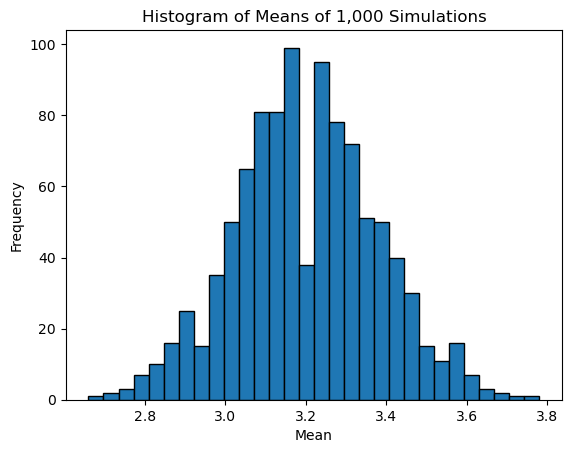

In [23]:
plt.hist(means_list, bins=30, edgecolor='black')
plt.title('Histogram of Means of 1,000 Simulations')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.show()

In [24]:
sample_mean = np.mean(means_list)
sample_std_dev = np.std(means_list)

In [25]:
theoretical_mean = np.mean([1, 2, 3, 4, 5])
theoretical_std_dev = np.std([1, 2, 3, 4, 5]) / np.sqrt(50)

In [26]:
print("Sample mean:", sample_mean)
print("Sample standard deviation:", sample_std_dev)
print("Theoretical mean (population mean):", theoretical_mean)
print("Theoretical standard deviation (population std dev / sqrt(n)):", theoretical_std_dev)

Sample mean: 3.2004200000000003
Sample standard deviation: 0.1773815762699159
Theoretical mean (population mean): 3.0
Theoretical standard deviation (population std dev / sqrt(n)): 0.2
